# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

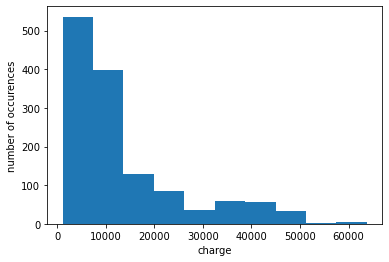

In [4]:
plt.hist(medical['charges'])
plt.xlabel('charge')
plt.ylabel('number of occurences')
plt.show()

In [5]:
mean = np.mean(medical['charges'])
std = np.std(medical['charges'])
print(mean, std)

13270.422265141257 12105.484975561605


The mean is 13270.42 and the std is 12105.48.  The std is very high, almost equal to the mean.  The histogram shows that the distribution of charges is not normal and the high values in the tail cause the std to be very high.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Since the data represents a random sample of charges and the sample size is large (1338) the distribution of means from random samples of the data should be normal.  With this data a confidence interval for the true mean can be defined.

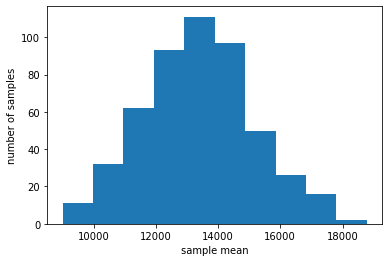

In [6]:
# Take 500 random samples of 50 charges, and plot the sample means to verify that the distribution is approximately normal
def sampler(n):
    return np.random.choice(medical['charges'], n)

samples = np.zeros(500)

seed(47)
for i in range(500):
    sample = sampler(50)
    sample_mean = np.mean(sample)
    samples[i] = sample_mean
    
plt.hist(samples)
plt.xlabel('sample mean')
plt.ylabel('number of samples')
plt.show()

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Given the nature of the administrator's concern, a one-sided interval is appropriate.  The administrator is only concerned about charges below 12000, so a one-sided interval to show the probability that charges are above a certain value will answer the question.

In [7]:
# Calculate the mean and std of samples
mean = np.mean(samples)
std = np.std(samples)

# Using a t table, the t value for a one sided 95% confidence interval is the same as for a two sided 90% interval, 1.646
t = 1.648
moe = std * t
val1 = -moe + mean
print('There is a 95% chance that the charges are greater than ' + str(val1))

There is a 95% chance that the charges are greater than 10484.14936811644


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

Null Hypothesis: People with insurance are charged a different amount than those without insurance.

Hypothesis: People with insurance are not charged a different amount than those without insurance.

When performing a t-test, homogeneity of variance is assumed.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [8]:
# Separate the insured people from the uninsured people and calculate the number of charges, std, and mean for each group
insured = medical.query('insuranceclaim>0')['charges']
n0 = len(insured)
s0 = np.std(insured)
x0 = np.mean(insured)

uninsured = medical.query('insuranceclaim==0')['charges']
n1 = len(uninsured)
s1 = np.std(uninsured)
x1 = np.mean(uninsured)


In [9]:
# Calculate the pooled std
numerator = ((n0-1)*s0**2) + ((n1-1)*s1**2)
denominator = n0+n1-2
sp = np.sqrt(numerator/denominator)

# Calculate the t-statistic
num = x0-x1
den = sp*np.sqrt((1/n0) + 1/n1)
t = num/den

# With this t value, p is < 0.0001
print('t = ' + str(t) + ', p < 0.0001')

t = 11.901306943555385, p < 0.0001


In [10]:
t_scipy = scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=True, alternative='two-sided')
print(t_scipy)

Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)


Based on the p value, it appears that we can accept the null hypothesis.  People who do not have insurance are charged differently than people with insurance.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

There are two functions that can be used to get the z-score.  In order to use either, the population must be normally distributed and the population std must be known (or the sample size must be large (thumb rule is n>=30))

scipy.stats.zmap(scores, compare, axis=0, ddof=0, nan_policy='propagate')

Calculate the relative z-scores for two different sets of data


scipy.stats.zscore(a, axis=0, ddof=0, nan_policy='propagate')

Compute the z-score for each entry in a single set of data

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test